In [34]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from skopt import BayesSearchCV 

In [2]:
import warnings
# Suppress FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [4]:
df = pd.read_csv('review_normalized.csv')
df.head()

,id,name,description,review,hotel_class,no_of_amenities,price_level,dist_to_metro,no_of_attractions,award,...,sleep_quality,rooms,check_in_front_desk,business_service,ratings,normalized_review,normalized_description,normalized_name,target,sentiment
0,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,We had a whisper-quiet queen deluxe room couty...,4.0,50,very expensive,130.96,5,1,...,5.0,5.0,4.0,4.0,5.0,whisper quiet queen deluxe room coutyard room ...,experience magic time square step door escape ...,casablanca hotel time square,1,positive
1,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,Great 3 night stay right after Thanksgiving. A...,4.0,50,very expensive,130.96,5,1,...,5.0,4.0,4.0,4.0,5.0,great night stay right thanksgiving agree prev...,experience magic time square step door escape ...,casablanca hotel time square,1,positive
2,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,I hesitate to give this little gem a stellar r...,4.0,50,very expensive,130.96,5,1,...,5.0,5.0,4.0,4.0,5.0,hesitate give little gem stellar review fear a...,experience magic time square step door escape ...,casablanca hotel time square,1,positive
3,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,You won't find a more conveniently located hot...,4.0,50,very expensive,130.96,5,1,...,5.0,4.0,4.0,4.0,5.0,find conveniently locate hotel nyc pace count ...,experience magic time square step door escape ...,casablanca hotel time square,1,positive
4,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,This small boutique hotel right off Times Squa...,4.0,50,very expensive,130.96,5,1,...,4.0,4.0,4.0,4.0,5.0,small boutique hotel right time square perfect...,experience magic time square step door escape ...,casablanca hotel time square,1,positive


In [5]:
df_copy = pd.DataFrame(df) #store a copy of the dataframe just in case

# Drop unnecssary columns:
df = df.drop(columns = ['normalized_review', 'normalized_description', 'normalized_name', 'target', 'id', 'name', 'description', 'review'])

df.head()

,hotel_class,no_of_amenities,price_level,dist_to_metro,no_of_attractions,award,no_of_reviews,service,cleanliness,value,location,sleep_quality,rooms,check_in_front_desk,business_service,ratings,sentiment
0,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,positive
1,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,positive
2,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,positive
3,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,positive
4,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,positive


# Step 1: Check null

In [8]:
df.isna().sum()

hotel_class            0
no_of_amenities        0
price_level            0
dist_to_metro          0
no_of_attractions      0
award                  0
no_of_reviews          0
service                0
cleanliness            0
value                  0
location               0
sleep_quality          0
rooms                  0
check_in_front_desk    0
business_service       0
ratings                0
sentiment              0
dtype: int64

!! **There are nulls in 'sentiment' - Need to re-check with Tien. For now, we just remove these nulls**

In [9]:
df = df.dropna()

# re-check if all nulls are removed:

df.isna().sum()

hotel_class            0
no_of_amenities        0
price_level            0
dist_to_metro          0
no_of_attractions      0
award                  0
no_of_reviews          0
service                0
cleanliness            0
value                  0
location               0
sleep_quality          0
rooms                  0
check_in_front_desk    0
business_service       0
ratings                0
sentiment              0
dtype: int64

# Step 2: Check data types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239166 entries, 0 to 239165
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   hotel_class          239166 non-null  float64
 1   no_of_amenities      239166 non-null  int64  
 2   price_level          239166 non-null  object 
 3   dist_to_metro        239166 non-null  float64
 4   no_of_attractions    239166 non-null  int64  
 5   award                239166 non-null  int64  
 6   no_of_reviews        239166 non-null  int64  
 7   service              239166 non-null  float64
 8   cleanliness          239166 non-null  float64
 9   value                239166 non-null  float64
 10  location             239166 non-null  float64
 11  sleep_quality        239166 non-null  float64
 12  rooms                239166 non-null  float64
 13  check_in_front_desk  239166 non-null  float64
 14  business_service     239166 non-null  float64
 15  ratings          

**Comments**:

- Categorical variable: price_level (nominal), sentiment (binary) (**hotel_class**: there are values from 0, 1, 1.5, ... 4.5 - weird! supposed to be categorical, but we will treat this as numerical due to this reason.)
- Numerical varibles: rest

## Change our target variable 'ratings' to Positive (1) if ratings >= 4 / Negative (0) if 0 <= ratings <= 3

In [11]:
# Re-arrange: Move our target variable 'ratings' to the last column:

# Get all columns except 'ratings'
columns = [col for col in df.columns if col != 'ratings']

# Reorder the DataFrame with 'ratings' as the last column
df = df[columns + ['ratings']]

# Now 'ratings' is the last column in df
df.head()

,hotel_class,no_of_amenities,price_level,dist_to_metro,no_of_attractions,award,no_of_reviews,service,cleanliness,value,location,sleep_quality,rooms,check_in_front_desk,business_service,sentiment,ratings
0,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,positive,5.0
1,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,positive,5.0
2,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,positive,5.0
3,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,positive,5.0
4,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,positive,5.0


In [12]:
df['ratings'].value_counts()

ratings
5.0    101589
4.0     76777
3.0     31063
2.0     15680
1.0     14057
Name: count, dtype: int64

In [13]:
# 'ratings': 0 = negative, 1 = positive

df['ratings_binary'] = df['ratings'].apply(lambda val: 1 if val >= 4 else 0)

df = df.drop(['ratings'], axis = 1)

df.head()

,hotel_class,no_of_amenities,price_level,dist_to_metro,no_of_attractions,award,no_of_reviews,service,cleanliness,value,location,sleep_quality,rooms,check_in_front_desk,business_service,sentiment,ratings_binary
0,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,positive,1
1,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,positive,1
2,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,positive,1
3,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,positive,1
4,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,positive,1


# Step 3: Feature engineering

## 3.1. Categorical variables: One-hot coding

- **Binary categorical variable ('sentiment')**

In [14]:
# 'Sentiment': 0 = negative, 1 = positive

df['sentiment'] = df['sentiment'].apply(lambda val: 1 if val == 'positive' else 0)

- **Nominal categorical variable ('price_level')**

In [15]:
df['price_level'].value_counts()

price_level
very expensive    120682
expensive          59009
moderate           46362
low                10287
Not Specified       2826
Name: count, dtype: int64

In [16]:
# Create a one-hot encoded set of the 'price_level' values, using pd.get_dummies() & Convert boolean columns to integer (0/1):
price_level_set = pd.get_dummies(df['price_level'], prefix = 'price_level').astype(int)

# Concatenate this set back to the dataFrame
df = pd.concat([df, price_level_set], axis=1)

# Let's now have a look:
df.head()

,hotel_class,no_of_amenities,price_level,dist_to_metro,no_of_attractions,award,no_of_reviews,service,cleanliness,value,...,rooms,check_in_front_desk,business_service,sentiment,ratings_binary,price_level_Not Specified,price_level_expensive,price_level_low,price_level_moderate,price_level_very expensive
0,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,...,5.0,4.0,4.0,1,1,0,0,0,0,1
1,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,...,4.0,4.0,4.0,1,1,0,0,0,0,1
2,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,...,5.0,4.0,4.0,1,1,0,0,0,0,1
3,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,...,4.0,4.0,4.0,1,1,0,0,0,0,1
4,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,...,4.0,4.0,4.0,1,1,0,0,0,0,1


In [17]:
# Now, we no longer need 'Property_Area' column after encoding it. Hence, we will drop this column:

df = df.drop(['price_level'], axis = 1)

## 3.2. Numerical variables: Standardize

We'll investigate the variance of columns having numerical variables in the dataset to determine which features should be standardized.

In [18]:
# Step 1: Identify all numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Step 2: Exclude boolean columns (columns with exactly 2 unique values)
continuous_cols = numeric_cols.loc[:, numeric_cols.nunique() > 2].columns.tolist()

# Step 3: Calculate variance for only the continuous columns
variance = df[continuous_cols].var()

print(variance)

hotel_class            9.154227e-01
no_of_amenities        5.170557e+02
dist_to_metro          4.473735e+04
no_of_attractions      2.559658e+00
no_of_reviews          1.251214e+07
service                1.293059e+00
cleanliness            1.030005e+00
value                  1.226482e+00
location               6.614198e-01
sleep_quality          8.633781e-01
rooms                  1.055495e+00
check_in_front_desk    1.804572e-01
business_service       1.329029e-01
dtype: float64


In [19]:
# Calculate skewness for these columns
skewed_features = df[continuous_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
print("\nSkewness of Continuous Numeric Features:")
print(skewed_features)


Skewness of Continuous Numeric Features:
no_of_reviews          1.567536
no_of_amenities        0.640266
no_of_attractions      0.589653
dist_to_metro          0.514933
value                 -1.037590
rooms                 -1.165960
service               -1.468825
hotel_class           -1.617172
cleanliness           -1.704974
location              -2.150575
sleep_quality         -2.156172
check_in_front_desk   -3.154459
business_service      -4.543579
dtype: float64


In [20]:
from sklearn.preprocessing import StandardScaler

# Columns to standardize based on high variance and skewness
columns_to_standardize = ['no_of_reviews', 'no_of_amenities', 'dist_to_metro', 
                          'no_of_attractions']

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler only to the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Check the standardized data
print(df[columns_to_standardize].head())

   no_of_reviews  no_of_amenities  dist_to_metro  no_of_attractions
0       1.085053        -0.401305       -0.62376           1.829899
1       1.085053        -0.401305       -0.62376           1.829899
2       1.085053        -0.401305       -0.62376           1.829899
3       1.085053        -0.401305       -0.62376           1.829899
4       1.085053        -0.401305       -0.62376           1.829899


In [21]:
# Re-check variance:

print(df[continuous_cols].var())

hotel_class            0.915423
no_of_amenities        1.000004
dist_to_metro          1.000004
no_of_attractions      1.000004
no_of_reviews          1.000004
service                1.293059
cleanliness            1.030005
value                  1.226482
location               0.661420
sleep_quality          0.863378
rooms                  1.055495
check_in_front_desk    0.180457
business_service       0.132903
dtype: float64


# Correlation heatmap

### Correlation for categorical variables

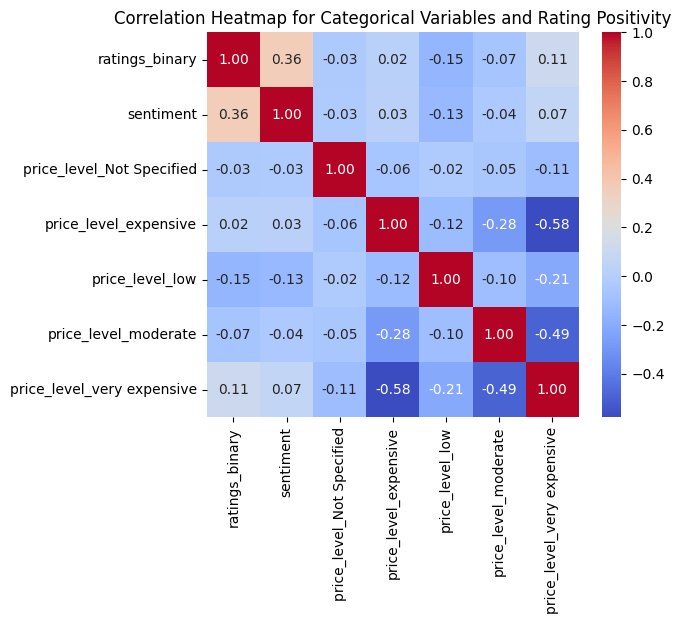

In [22]:
price_level_col = [col for col in df.columns if col in price_level_set.columns]
# Calculate correlation matrix
corr_matrix = df[['ratings_binary'] + ['sentiment'] + price_level_col].corr()

# Generate heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Categorical Variables and Rating Positivity')
plt.show()

### Correlation for numerical variables

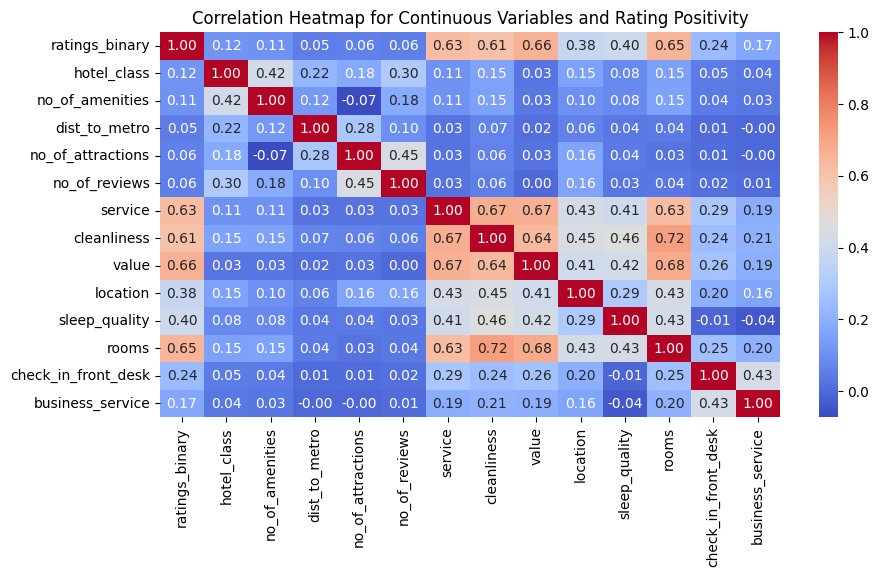

In [23]:
# Step 1: Identify all numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Step 2: Exclude boolean columns (columns with exactly 2 unique values)
continuous_cols = numeric_cols.loc[:, numeric_cols.nunique() > 2].columns.tolist()

# Calculate correlation matrix
corr_matrix = df[['ratings_binary'] + continuous_cols].corr()

# Generate heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Continuous Variables and Rating Positivity')
plt.show()

### Final correlation HeatMap

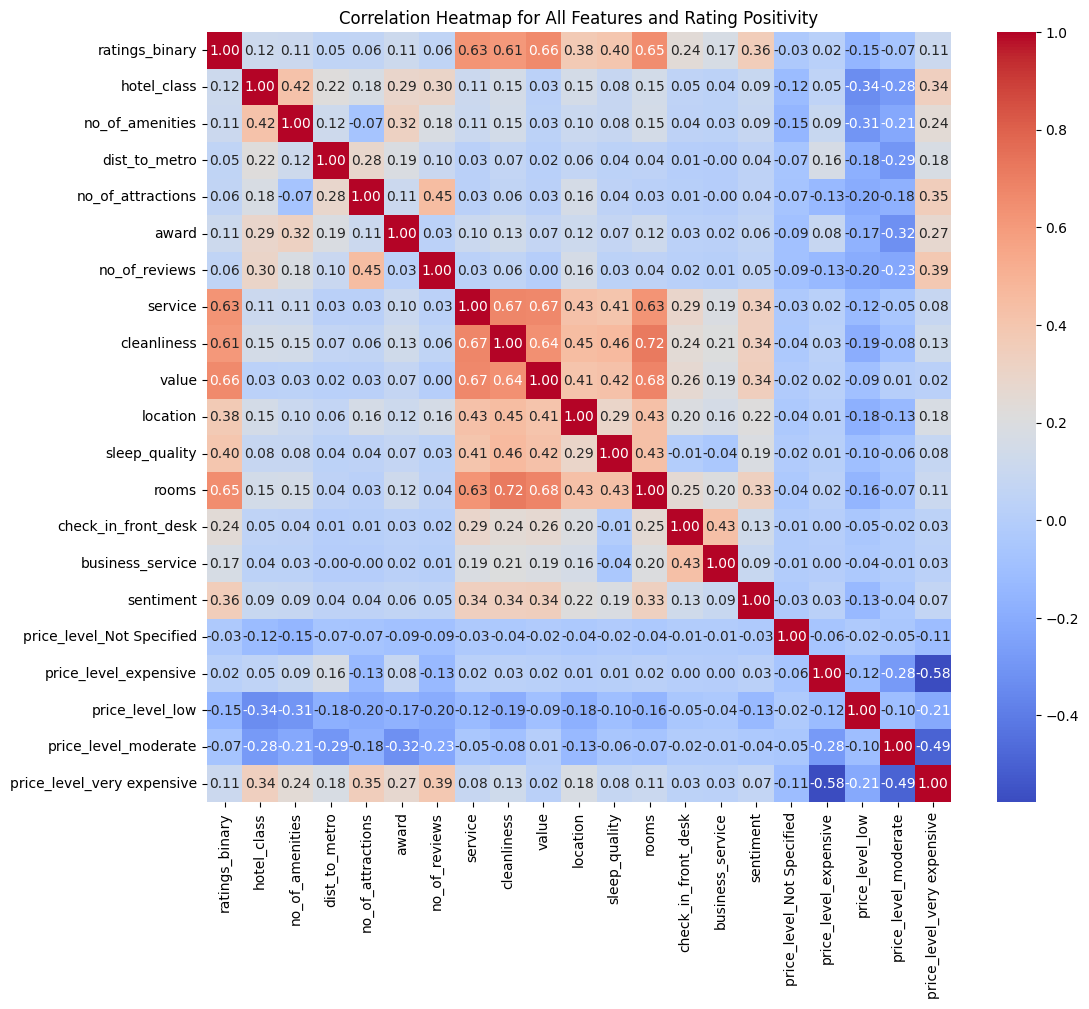

In [24]:
# Get all columns except 'ratings_binary'
columns = [col for col in df.columns if col != 'ratings_binary']

# Reorder the DataFrame with 'ratings' as the last column
df = df[['ratings_binary'] + columns]
final_corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(final_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for All Features and Rating Positivity')
plt.show()

# Step 4: Methods

### Distribution of target variable

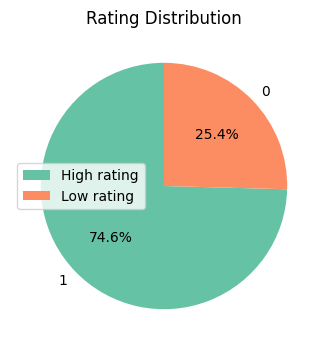

In [25]:
# First, check class distribution:

# Distribution of Target Variable ('ratings_binary')
plt.figure(figsize=(6, 4))
df['ratings_binary'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90)
plt.title('Rating Distribution')
plt.legend(labels=['High rating', 'Low rating'])
plt.ylabel('')  # Hides the y-label
plt.show()

## 4.1 Splitting dataset into training, testing and validation sets

In [26]:
# Define feature variables (use all columns except 'ratings_binary') and target variable:
X = df.drop(columns=['ratings_binary'])
y = df['ratings_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, shuffle = True, stratify = y)
# Since the data set is large enough and this part of the project does not account for the skewness of the data, and the dataset is large enough, we perform another split to have a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state=1234, shuffle= True, stratify = y_train)

#The final ratio of the 3 test_set would be train set : validation set : test set = 60:20:20
print(f"Train set: {len(X_train)}, validation set: {len(X_val)}, test set: {len(X_test)}")

Train set: 143499, validation set: 47833, test set: 47834


## 4.2 Data rebalance

Here we will use all classification models:

- Logistic Regression
- Decision Tree
- Random Forest
- Näive Bayes
- Ensemble methods: Bagging, Boosting (AdaBoost, XGBoost)


**Why These Models Are Selected:**
- Logistic Regression: A simple baseline model for binary classification, offering interpretability.
- Decision Tree: Provides a non-linear decision-making process and is easy to visualize.
- Random Forest: An ensemble method that reduces overfitting, improves accuracy, and handles feature importance.
- Naive Bayes: Suitable for classification with categorical features and is efficient with a large dataset.
- Ensemble Methods (Bagging, Boosting):
    - Bagging: Helps in reducing variance (e.g., Random Forest).
    - Boosting: Focuses on reducing bias, with AdaBoost and XGBoost being powerful boosting algorithms for improving accuracy.

https://www.researchgate.net/publication/355405456_When_is_resampling_beneficial_for_feature_selection_with_imbalanced_wide_data

Theo link này thì họ ghi là resamble trc thì ra kết quả tốt hơn cho RUS còn sau thì tốt hơn cho SMOTE lol em kh bik nữa

In [27]:
# Resampling methods
resampling_methods = {
'SMOTE': SMOTE(random_state=42),
'ADASYN': ADASYN(random_state=42),
'Random Under Sampling': RandomUnderSampler(random_state=1234)
}

In [28]:
# Initialize models
predict_models = {
    'Logistic Regression': LogisticRegression(random_state=1234, max_iter=500),
    'Decision Tree': DecisionTreeClassifier(random_state=1234),
    'Random Forest': RandomForestClassifier(random_state=1234),
    'Naive Bayes': GaussianNB(),
    'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1234),
    'AdaBoost': AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=1234),
    'XGBoost': XGBClassifier(random_state=1234)
}


In [29]:

"""
Plot ROC curves in one graph and confusion matrices across different models and resampling methods.

Parameters:
- models (dict): Dictionary of models to evaluate.
- X_test (array-like): Feature matrix for testing.
- y_test (array-like): True labels for testing.
- X_train (array-like): Feature matrix for training.
- y_train (array-like): True labels for training.
- resampling_methods (dict): Dictionary of resampling methods to apply.

Returns:
- DataFrame: Table containing evaluation metrics for each model and resampling method.
"""
num_models = len(predict_models)
num_resampling_methods = len(resampling_methods) + 1  # +1 for unbalanced data

# Set up the figure for ROC curves
plt.figure(figsize=(12, 8))

results = []

for i, (model_name, model) in enumerate(predict_models.items()):
    # Train and evaluate on unbalanced data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]  
    
    # Probability scores for ROC
    
    # Compute ROC and AUC for unbalanced data
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for unbalanced data
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    # Collect evaluation metrics for unbalanced data
    metrics = {
        'Model': model_name,
        'Resampling Method': 'Unbalanced',
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision ("low ratings" class)': precision_score(y_val, y_pred, pos_label=0),
        'Recall ("low ratings" class)': recall_score(y_val, y_pred, pos_label=0),
        'F1-score ("low ratings" class)': f1_score(y_val, y_pred, pos_label=0)
    }
    results.append(metrics)
    
    # Loop through resampling methods
    for resample_name, resampler in resampling_methods.items():
        # Resample the training data
        X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
        
        # Train and evaluate on resampled data
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_val)
        y_pred_proba = model.predict_proba(X_val)[:, 1]
        
        # Compute ROC and AUC for resampled data
        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve for resampled data
        plt.plot(fpr, tpr, linestyle='--', label=f'{model_name} - {resample_name} (AUC = {roc_auc:.2f})')

        # Collect evaluation metrics for resampled data
        metrics = {
            'Model': model_name,
            'Resampling Method': resample_name,
            'Accuracy': accuracy_score(y_val, y_pred),
            'Precision ("low ratings" class)': precision_score(y_val, y_pred, pos_label=0),
            'Recall ("low ratings" class)': recall_score(y_val, y_pred, pos_label=0),
            'F1-score ("low ratings" class)': f1_score(y_val, y_pred, pos_label=0)
        }
        results.append(metrics)

# ROC curve - finalize the plot
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Set up the figure for confusion matrices
fig, axes = plt.subplots(num_models, num_resampling_methods, figsize=(24, 6 * num_models))

for i, (model_name, model) in enumerate(predict_models.items()):
    # Unbalanced data confusion matrix
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    cm_unbalanced = confusion_matrix(y_val, y_pred, normalize='true')
    sns.heatmap(cm_unbalanced, annot=True, fmt=".2f", cmap='Blues', ax=axes[i, 0],
                xticklabels=["Low rating", "High rating"], 
                yticklabels=["Low rating", "High rating"])
    axes[i, 0].set_title(f'{model_name} - Unbalanced')
    axes[i, 0].set_xlabel("Predicted Class")
    axes[i, 0].set_ylabel("Actual Class")

    # Resampling methods confusion matrices
    for j, (resample_name, resampler) in enumerate(resampling_methods.items(), start=1):
        X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_val)
        cm_resampled = confusion_matrix(y_val, y_pred, normalize='true')
        sns.heatmap(cm_resampled, annot=True, fmt=".2f", cmap='Blues', ax=axes[i, j],
                    xticklabels=["Low rating", "High rating"], 
                    yticklabels=["Low rating", "High rating"])
        axes[i, j].set_title(f'{model_name} - {resample_name}')
        axes[i, j].set_xlabel("Predicted Class")
        axes[i, j].set_ylabel("Actual Class")

plt.tight_layout()
plt.show()

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Pivot the DataFrame to have metrics as rows
results_pivot = results_df.pivot_table(index=['Model', 'Resampling Method'], 
                                        values=['Accuracy', 
                                                'Precision ("low ratings" class)', 
                                                'Recall ("low ratings" class)', 
                                                'F1-score ("low ratings" class)'],
                                        aggfunc='mean').T  # Transpose for metrics as rows

# Print the pivoted DataFrame
print(results_pivot)


ValueError: Found input variables with inconsistent numbers of samples: [47834, 47833]

<Figure size 1200x800 with 0 Axes>

**Comment**: 

- SMOTE is the best resampling method based on the f1-score (0.83) and precision (0.81), making it the most balanced method for predicting the minority class (Low ratings). It captures a good proportion of low ratings while also maintaining fewer false positives.

- Random Under-Sampling has the best recall (0.90), meaning it identifies more low ratings, but it sacrifices some precision.

It is most important for the company to correctly predict the actual low ratings, so that actions can be taken to intervene before dissatisfied customers leave and hence, minimize customer retention. Our focus is to correct identify True Negative and we will select the final model based on the highest recall of 'Low rating' class.

--> The best model is **Random Under Sampling method**

## 4.3 Feature Selection

In [30]:
# Transform X_train, y_train using RUS
X_train, y_train = resampling_methods['Random Under Sampling'].fit_resample(X_train, y_train)

Binary Cross-Entropy Loss / Log Loss (log_loss) is chosen as the loss function since it is the most common choice of loss function for binary classification task.

### Before feature selection

In [32]:


tr_errors = []
val_errors = []


for i, (model_name, model) in enumerate(predict_models.items()):
    # Dataset confusion matrix
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    y_pred_train = model.predict(X_train)
    
    val_errors.append(log_loss(y_val, y_pred_val))
    tr_errors.append(log_loss(y_train, y_pred_train))

# Create a table to compare the training and validation errors
errors = {
    "models": predict_models.keys(),
    "training errors": tr_errors,
    "validation errors": val_errors,
}
print(pd.DataFrame(errors))




                models  training errors  validation errors
0  Logistic Regression         4.544978           4.102977
1        Decision Tree         1.364976           4.882882
2        Random Forest         1.365470           4.010293
3          Naive Bayes         5.059746           4.219021
4              Bagging         1.571476           4.393840
5             AdaBoost         1.364976           4.478989
6              XGBoost         3.080705           3.699084


### Perform feature selection to compare the results
The validation errors are small, meaning that the data does not show signs of overfitting, however, feature selection is performed to reduce noise in the dataset

#### **Forward selection**

In [ ]:
sfs_dict = {}
for i, (model_name, model) in enumerate(predict_models.items()):
        sfs_dict[model_name] = SFS(
            model,
            k_features=(1, X_train.shape[1]),
            forward= True,
            scoring="neg_log_loss",
            cv=5,
            verbose=1,
            n_jobs=-1
        )
sfs_dict


{'Logistic Regression': SequentialFeatureSelector(estimator=LogisticRegression(max_iter=500,
                                                        random_state=1234),
                           k_features=(1, 20), n_jobs=-1, scoring='neg_log_loss',
                           verbose=1),
 'Decision Tree': SequentialFeatureSelector(estimator=DecisionTreeClassifier(random_state=1234),
                           k_features=(1, 20), n_jobs=-1, scoring='neg_log_loss',
                           verbose=1),
 'Random Forest': SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=1234),
                           k_features=(1, 20), n_jobs=-1, scoring='neg_log_loss',
                           verbose=1),
 'Naive Bayes': SequentialFeatureSelector(estimator=GaussianNB(), k_features=(1, 20), n_jobs=-1,
                           scoring='neg_log_loss', verbose=1),
 'Bagging': SequentialFeatureSelector(estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
            

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    9.5s finished
Features: 1/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    4.9s finished
Features: 2/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    4.7s finished
Features: 3/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    6.0s finished
Features: 4/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    8.5s finished
Features: 5/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   11.7s finished
Features: 6/20[Parallel(n_jobs=-1)]: Using backe

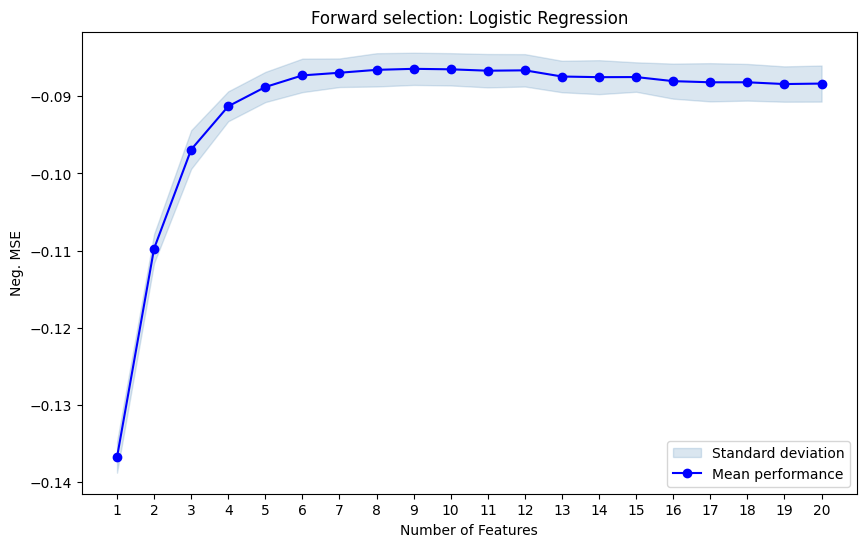

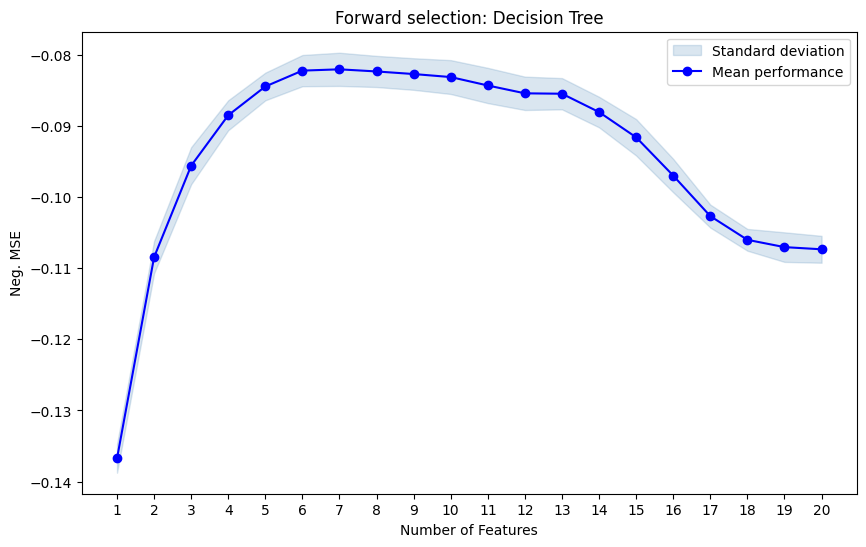

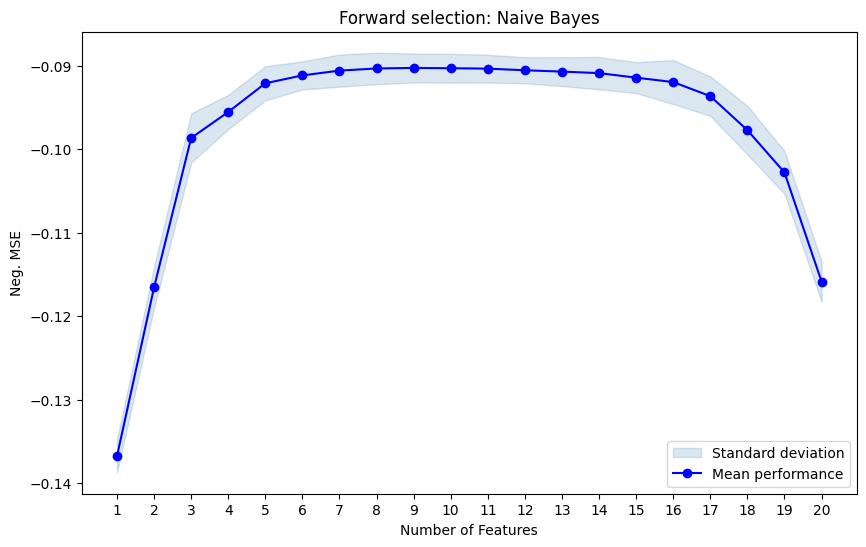

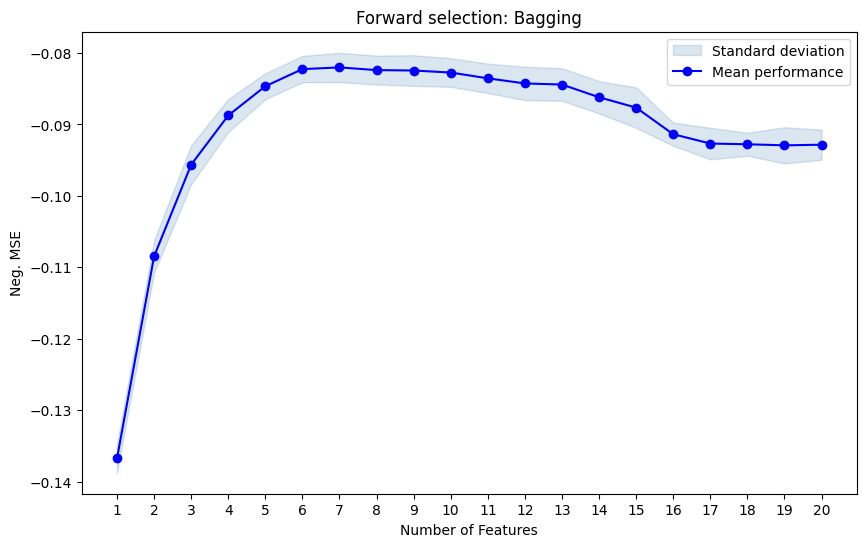

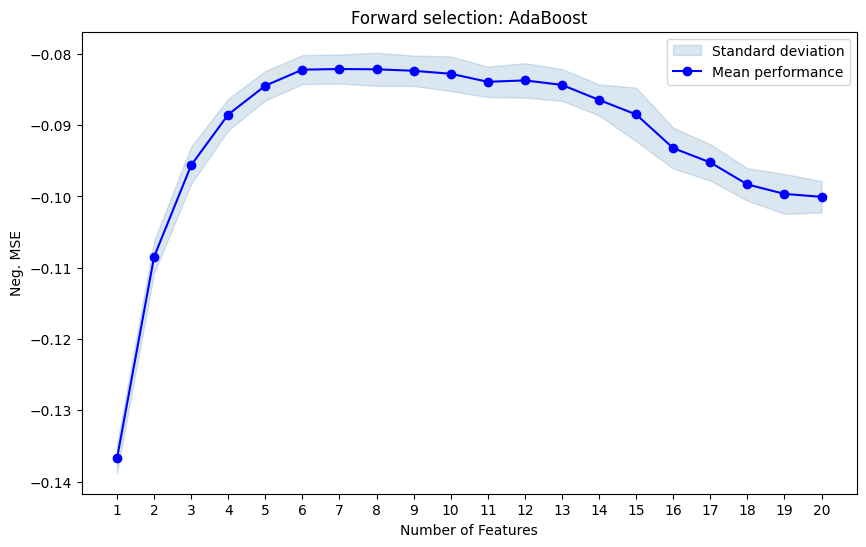

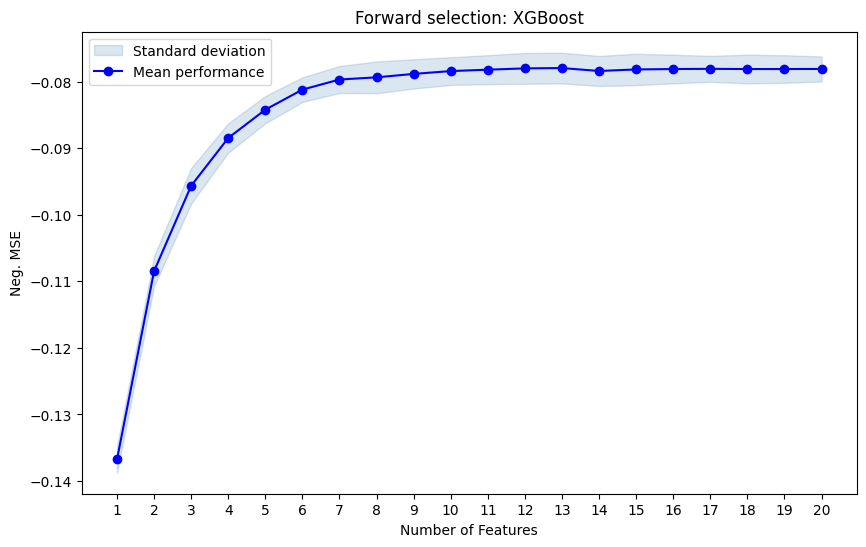

In [33]:

features_names = {}
n_features = []
k_score = []
sfs_dict_exclude =  {key: value for key, value in sfs_dict.items() if key != 'Random Forest'}

for i, (model_name, sfs) in enumerate(sfs_dict_exclude.items()):
	sfs.fit(X_train, y_train)

	#Plot the number of features during selection
	plot_sfs(sfs.get_metric_dict(), ylabel="Neg. Log loss", figsize=(10,6))
	plt.title(f"Forward selection: {model_name}")
	plt.legend(["Standard deviation", "Mean performance"])

	#Append data into list
	features_names[model_name] = sfs.k_feature_names_
	n_features.append(len(sfs.k_feature_names_))
	k_score.append(sfs.k_score_)
	


Random Forest is singled out since it takes a long time to load

#### **Backward selection**

In [37]:
sfs_dict_2= {}
for i, (model_name, model) in enumerate(predict_models.items()):
        sfs_dict_2[model_name] = SFS(
            model,
            k_features=(1, X_train.shape[1]),
            forward= False,
            scoring="neg_log_loss",
            cv=5,
            verbose=1,
            n_jobs=-1
        )
sfs_dict

{'Logistic Regression': SequentialFeatureSelector(estimator=LogisticRegression(max_iter=500,
                                                        random_state=1234),
                           forward=False, k_features=(1, 20), n_jobs=-1,
                           scoring='neg_mean_squared_error', verbose=1),
 'Decision Tree': SequentialFeatureSelector(estimator=DecisionTreeClassifier(random_state=1234),
                           forward=False, k_features=(1, 20), n_jobs=-1,
                           scoring='neg_mean_squared_error', verbose=1),
 'Random Forest': SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=1234),
                           forward=False, k_features=(1, 20), n_jobs=-1,
                           scoring='neg_mean_squared_error', verbose=1),
 'Naive Bayes': SequentialFeatureSelector(estimator=GaussianNB(), forward=False,
                           k_features=(1, 20), n_jobs=-1,
                           scoring='neg_mean_squared_error',

c:\Users\thyph\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.4min finished
Features: 19/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:  1.3min finished
Features: 18/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.2min finished
Features: 17/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   39.5s finished
Features: 16/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16

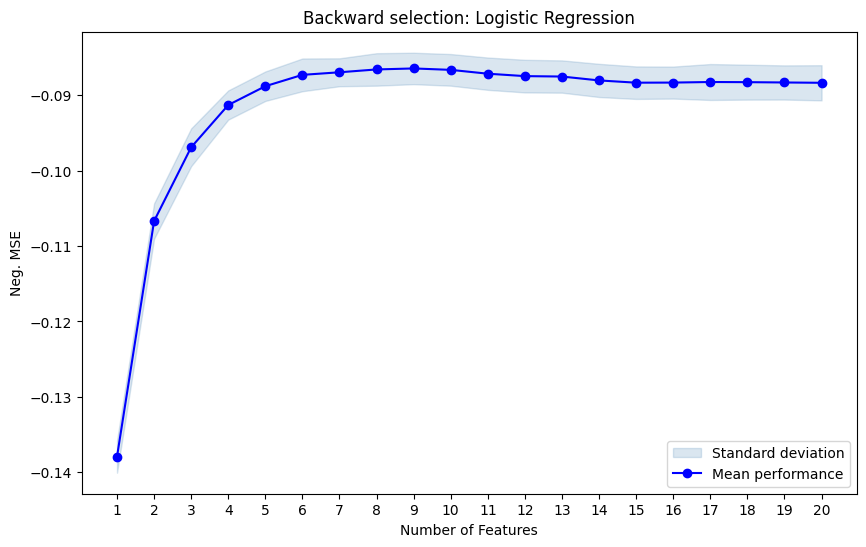

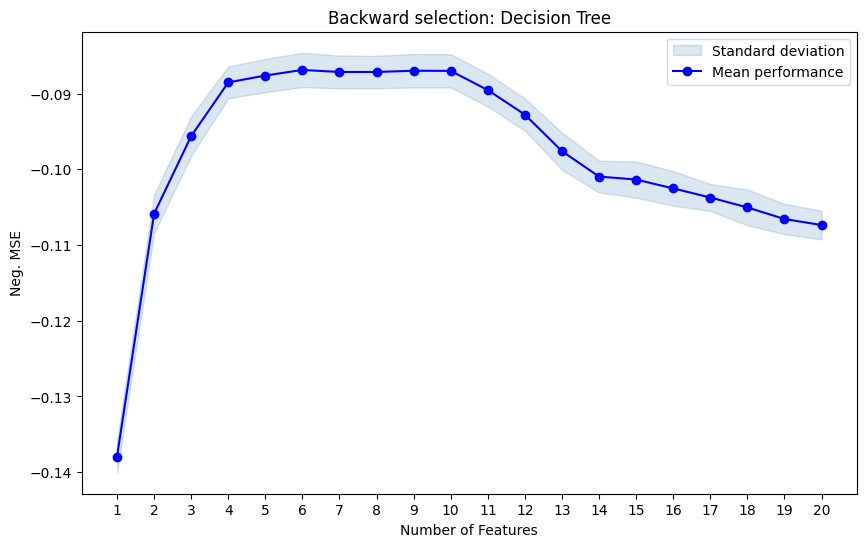

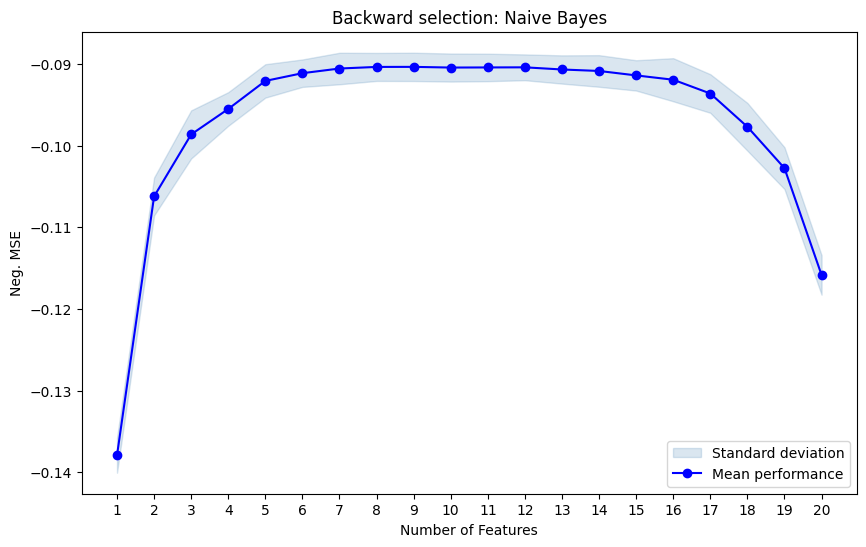

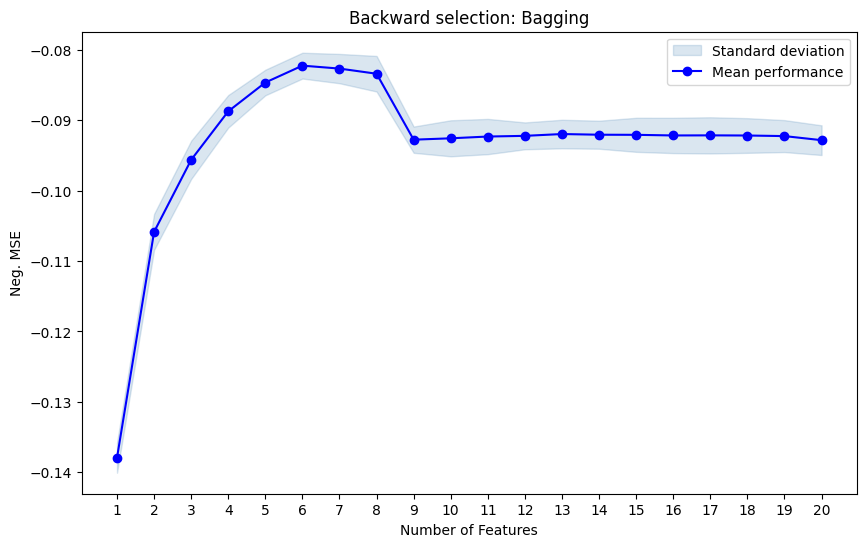

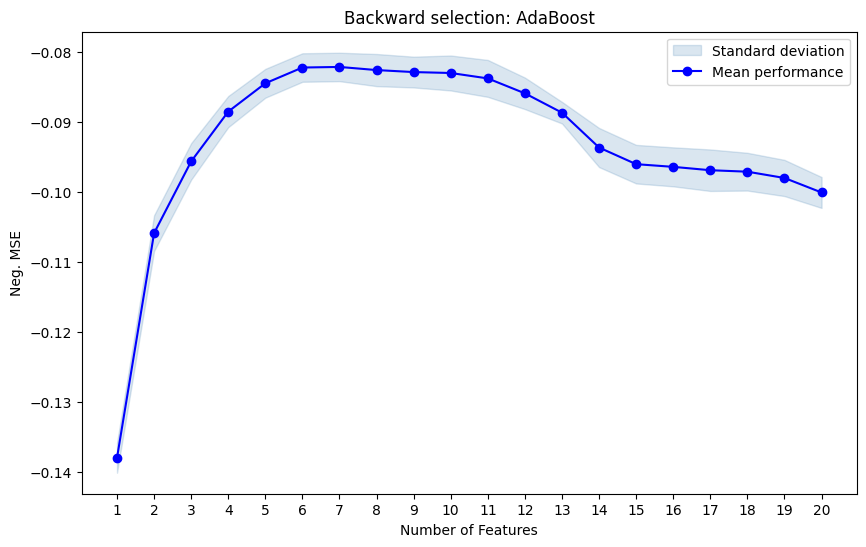

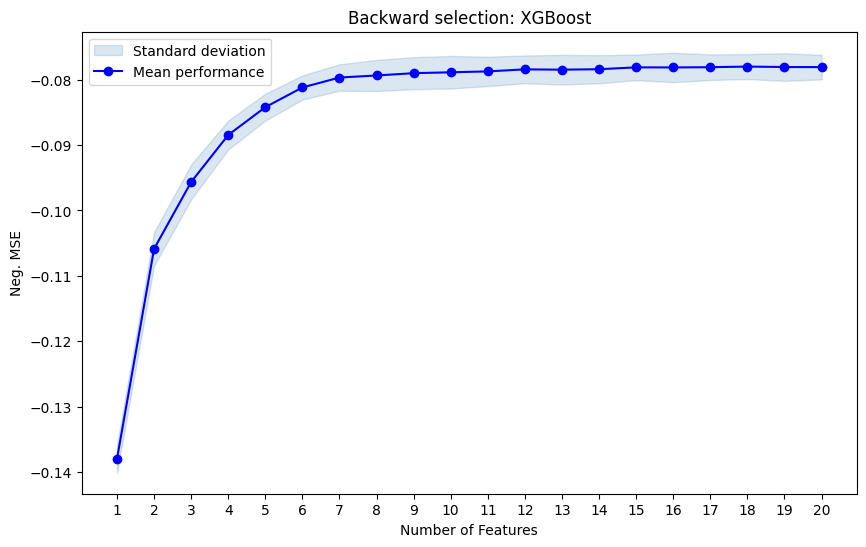

In [40]:
features_names_2 = {}
n_features_2 = []
k_score_2 = []
sfs_dict_exclude_2 =  {key: value for key, value in sfs_dict_2.items() if key != 'Random Forest'}

for i, (model_name, sfs) in enumerate(sfs_dict_exclude_2.items()):
	sfs.fit(X_train, y_train)

	#Plot the number of features during selection
	plot_sfs(sfs.get_metric_dict(), ylabel="Neg. Log loss", figsize=(10,6))
	plt.title(f"Backward selection: {model_name}")
	plt.legend(["Standard deviation", "Mean performance"])

	#Append data into list
	features_names_2[model_name] = sfs.k_feature_names_
	n_features_2.append(len(sfs.k_feature_names_))
	k_score_2.append(sfs.k_score_)
	

### Random Forest

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.9min finished
Features: 1/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:  2.2min finished
Features: 2/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.4min finished
Features: 3/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:  3.2min finished
Features: 4/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  3.1min finished
Features: 5/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.4min finished
Features: 6/20[Parallel(n_jobs=-1)]: Using backe

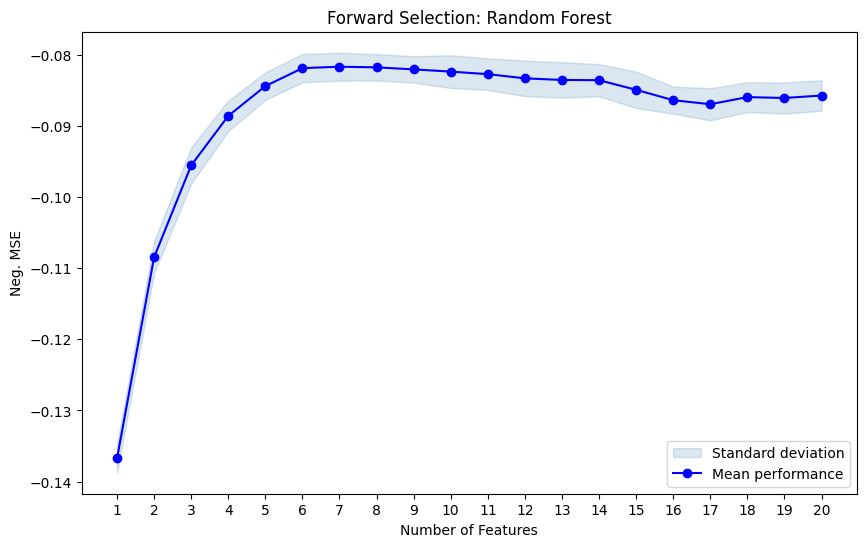

In [41]:
forest_model = RandomForestClassifier(random_state=1234)
forest_sfs = SFS(
            forest_model,
            k_features=(1, X_train.shape[1]),
            forward=True,
            scoring="neg_log_loss",
            cv=5,
            verbose=1,
            n_jobs=-1)
forest_sfs.fit(X_train, y_train)
plot_sfs(forest_sfs.get_metric_dict(), ylabel="Neg. Log loss", figsize=(10,6))
plt.title(f"Forward Selection: Random Forest")
plt.legend(["Standard deviation", "Mean performance"])


c:\Users\thyph\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 10.9min finished
Features: 19/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed: 10.4min finished
Features: 18/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  9.7min finished
Features: 17/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:  9.3min finished
Features: 16/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16

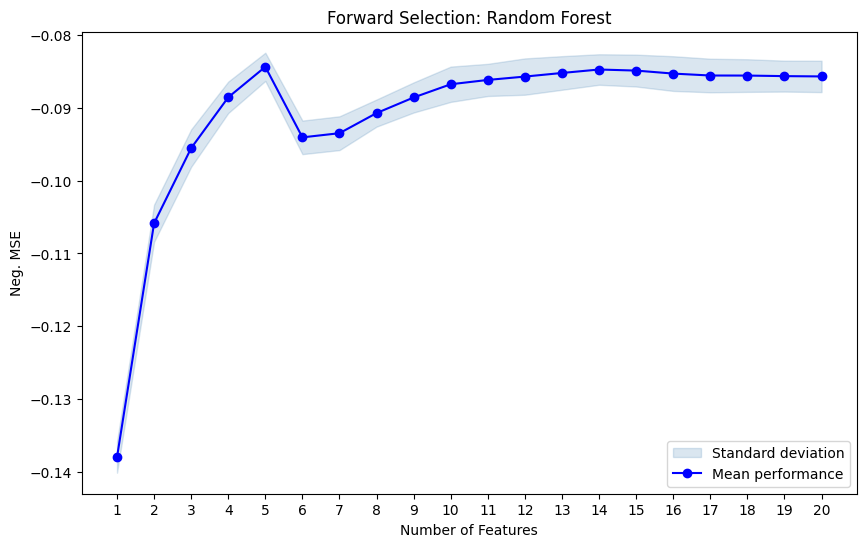

In [42]:
forest_sfs_2 = SFS(
            forest_model,
            k_features=(1, X_train.shape[1]),
            forward= False,
            scoring="neg_log_loss",
            cv=5,
            verbose=1,
            n_jobs=-1)
forest_sfs_2.fit(X_train, y_train)



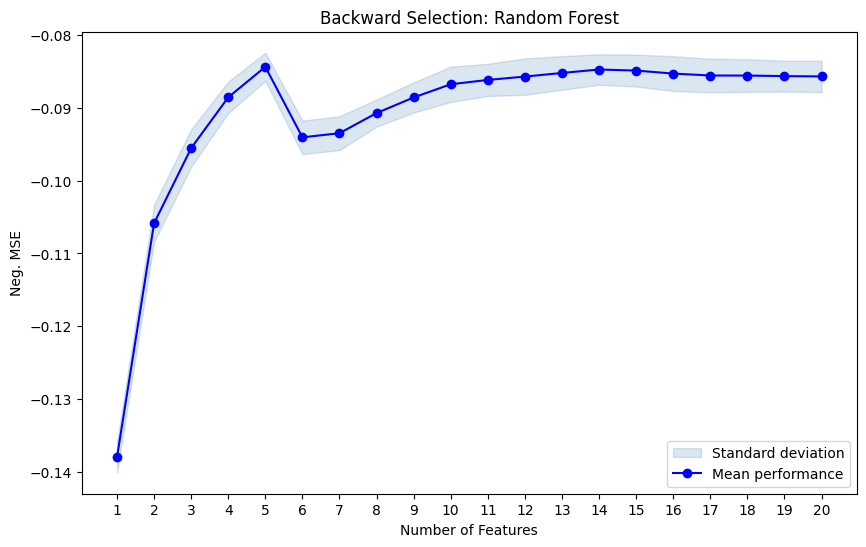

In [54]:
plot_sfs(forest_sfs_2.get_metric_dict(), ylabel="Neg. Log loss", figsize=(10,6))
plt.title(f"Backward Selection: Random Forest")
plt.legend(["Standard deviation", "Mean performance"])

In [43]:
features_names['Random Forest'] = forest_sfs.k_feature_names_
n_features.insert(2,len(forest_sfs.k_feature_names_))
k_score.insert(2,forest_sfs.k_score_)



In [44]:
features_names_2['Random Forest'] = forest_sfs_2.k_feature_names_
n_features_2.insert(2,len(forest_sfs_2.k_feature_names_))
k_score_2.insert(2,forest_sfs_2.k_score_)


In [45]:
print(f"Number of features selected for each model using Forward Selection: {n_features}")
print(f"Number of features selected for each model using Backward Selection: {n_features_2}")

Number of features selected for each model using Forward Selection: [9, 7, 7, 9, 7, 7, 13]
Number of features selected for each model using Backward Selection: [9, 6, 5, 9, 6, 7, 18]


In [46]:
print(f"Selected columns for each model using Forward Selection: {features_names}")
print(f"Selected columns for each model using Backwar Selection: {features_names_2}")

Selected columns for each model using Forward Selection: {'Logistic Regression': ('service', 'cleanliness', 'value', 'location', 'sleep_quality', 'rooms', 'business_service', 'sentiment', 'price_level_low'), 'Decision Tree': ('service', 'cleanliness', 'value', 'sleep_quality', 'rooms', 'sentiment', 'price_level_low'), 'Naive Bayes': ('dist_to_metro', 'no_of_attractions', 'no_of_reviews', 'service', 'cleanliness', 'value', 'rooms', 'sentiment', 'price_level_very expensive'), 'Bagging': ('service', 'cleanliness', 'value', 'sleep_quality', 'rooms', 'sentiment', 'price_level_low'), 'AdaBoost': ('service', 'cleanliness', 'value', 'sleep_quality', 'rooms', 'sentiment', 'price_level_low'), 'XGBoost': ('no_of_amenities', 'no_of_reviews', 'service', 'cleanliness', 'value', 'location', 'sleep_quality', 'rooms', 'check_in_front_desk', 'business_service', 'sentiment', 'price_level_Not Specified', 'price_level_very expensive'), 'Random Forest': ('service', 'cleanliness', 'value', 'sleep_quality', '

### After feature selection

c:\Users\thyph\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


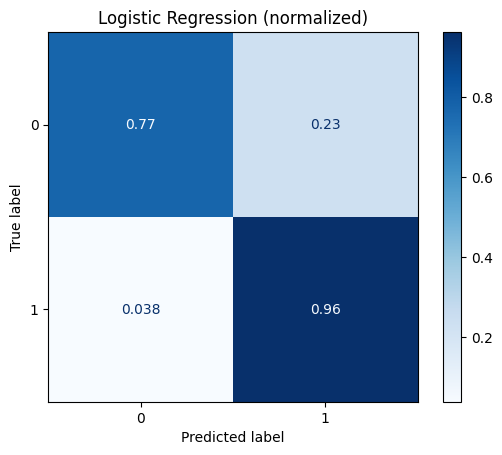

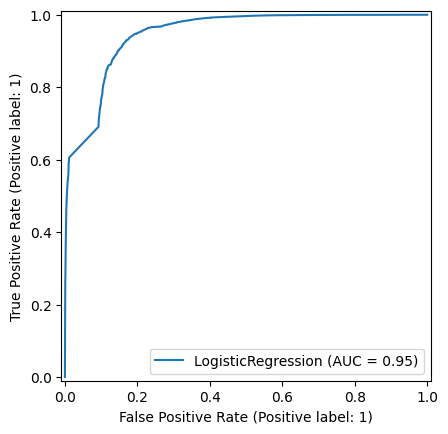

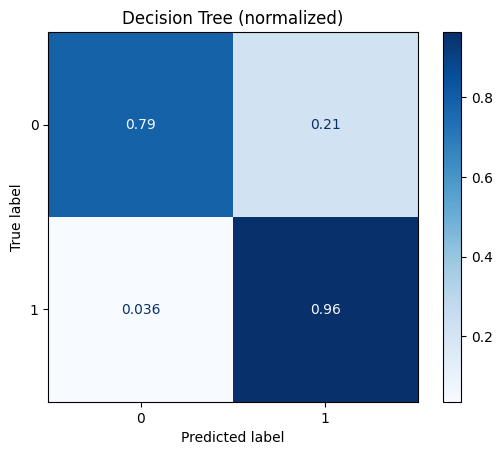

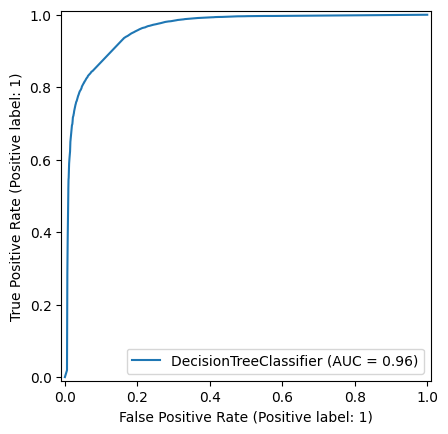

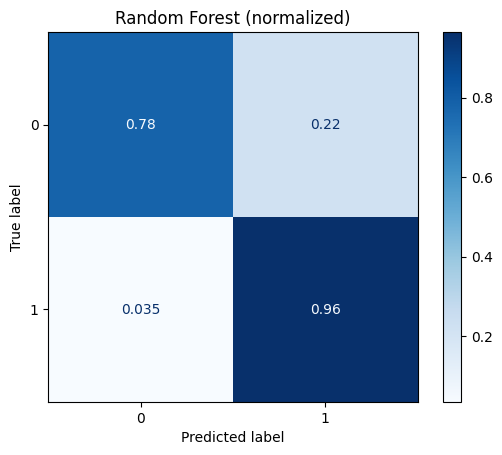

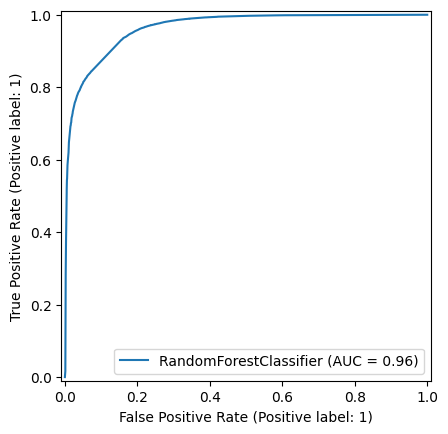

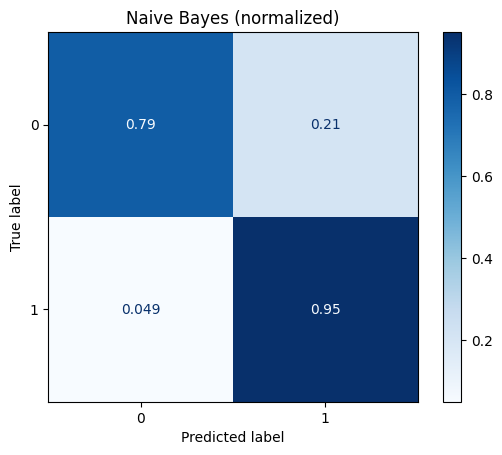

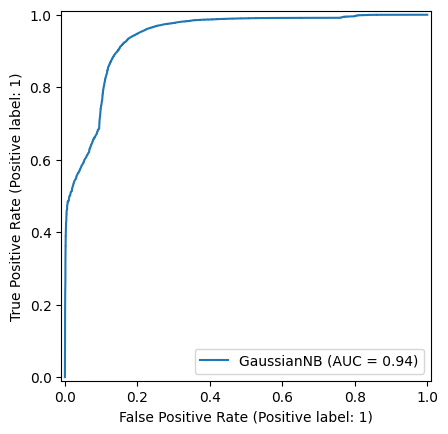

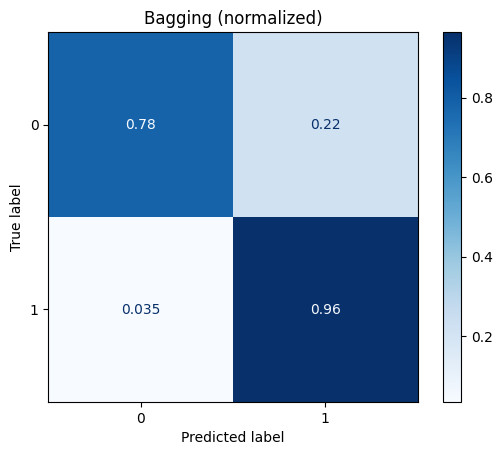

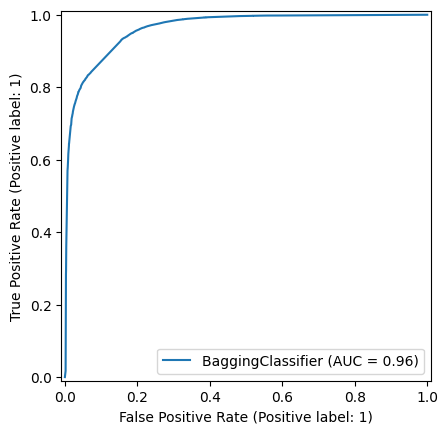

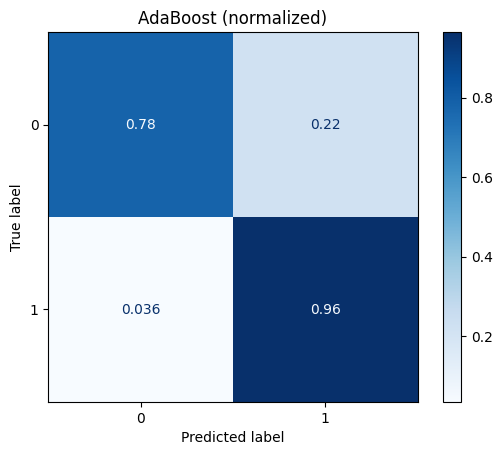

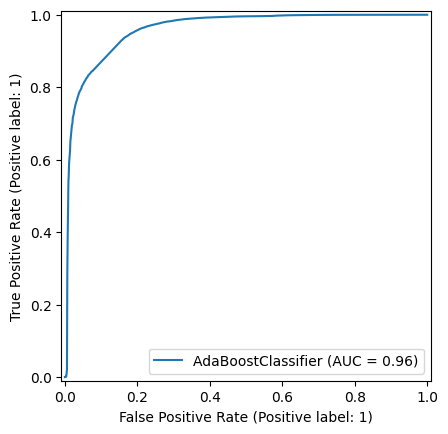

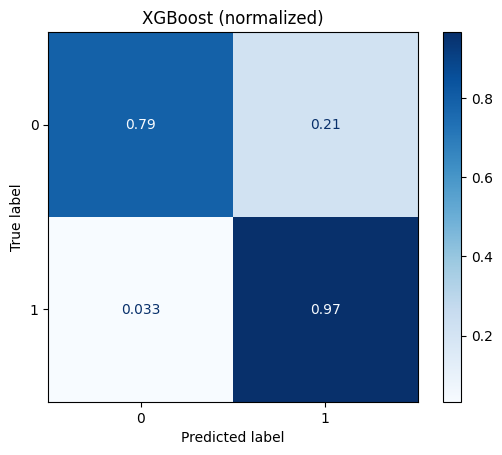

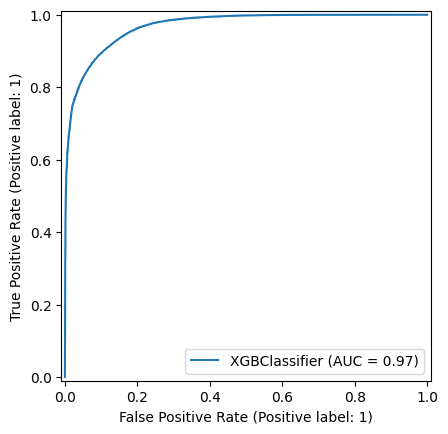

In [47]:
tr_errors_2 = []
val_errors_2 = []
accuracy_score_2 = [] #accuracy score on validation set

for i, (model_name, model) in enumerate(predict_models.items()):
	columns_2 = [col for col in X_train.columns if col in features_names[model_name]]
	X_train_sfs = X_train[columns_2]
	X_val_sfs = X_val[columns_2]
	model.fit(X_train_sfs, y_train)
	y_pred_val = model.predict(X_val_sfs)
	y_pred_tr = model.predict(X_train_sfs)
	tr_errors_2.append(log_loss(y_train, y_pred_tr))
	val_errors_2.append(log_loss(y_val, y_pred_val))
	
    #final evaluation of the model
	y_val_test = model.predict(X_val_sfs)
	accuracy_score_2.append(accuracy_score(y_val, y_pred_val))




In [60]:
tr_errors_3 = []
val_errors_3 = []
accuracy_score_3 = [] #accuacy score on validation set

for i, (model_name, model) in enumerate(predict_models.items()):
	columns_3 = [col for col in X_train.columns if col in features_names_2[model_name]]
	X_train_sfs = X_train[columns_3]
	X_val_sfs = X_val[columns_3]
	model.fit(X_train_sfs, y_train)
	y_pred_val = model.predict(X_val_sfs)
	y_pred_tr = model.predict(X_train_sfs)
	tr_errors_3.append(log_loss(y_train, y_pred_tr))
	val_errors_3.append(log_loss(y_val, y_pred_val))
	
	y_pred_test = model.predict(X_val_sfs)
	accuracy_score_3.append(accuracy_score(y_val, y_pred_val))

c:\Users\thyph\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Summary

### Performance comparison with Forward Selection

In [31]:
improve_tr = [a - b for a, b in zip(tr_errors, tr_errors_2)]
improve_val = [a - b for a, b in zip(val_errors, val_errors_2)]
summary = {
    
    
    "models": predict_models.keys(),
    "training errors": tr_errors_2,
    "validation errors": val_errors_2,
    "accuracy_score": accuracy_score_2,
    "training improvement": improve_tr,
    "validation improvement": improve_val 

}
print(pd.DataFrame(summary))

NameError: name 'tr_errors' is not defined

### Performance comparison with Backward Selection

In [61]:
improve_tr_2 = [a - b for a, b in zip(tr_errors, tr_errors_3)]
improve_val_2 = [a - b for a, b in zip(val_errors, val_errors_3)]
summary = {
    
    
    "models": predict_models.keys(),
    "training errors": tr_errors_3,
    "validation errors": val_errors_3,
    "accuracy_score": accuracy_score_3,
    "training improvement": improve_tr_2,
    "validation improvement": improve_val_2

}
print(pd.DataFrame(summary))

                models  training errors  validation errors  accuracy_score  \
0  Logistic Regression         0.086022           0.086572        0.912217   
1        Decision Tree         0.085694           0.086175        0.911569   
2        Random Forest         0.083366           0.084670        0.914454   
3          Naive Bayes         0.089673           0.089562        0.907848   
4              Bagging         0.078426           0.081659        0.917005   
5             AdaBoost         0.077192           0.081199        0.917046   
6              XGBoost         0.069541           0.077499        0.920391   

   training improvement  validation improvement  
0              0.001331                0.001192  
1             -0.054941                0.019589  
2             -0.052600                0.000836  
3              0.025930                0.024878  
4             -0.043791                0.009763  
5             -0.046439                0.020007  
6             -0.000516  

# Step 5: Hyper parameter tuning

In [ ]:
### Cái này depends xem cuối cùng forward hay backward tốt hơn nha chị nếu mà forward thì tên là features_name
### Only select relevant features for training, validation, and testing set
columns_xgb= [col for col in X_train.columns if col in features_names['XGBoost']]
X_train_xgb = X_train[columns_xgb]
X_val_xgb = X_val[columns_xgb]
X_test_xgb = X_test[columns_xgb]

# Define the original model for tuning
xgb_model = XGBClassifier(random_state=1234)

## a) Grid Search - XGradientBoost

In [66]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)

grid_search = grid_search.fit(X_train_xgb, y_train)

# Print best parameters from Grid Search
print("Best parameters from Grid Search: ", grid_search.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


PicklingError: Could not pickle the task to send it to the workers.

## b) Bayesian Search - XGradientBoost

In [ ]:


# Define the parameter grid for Bayesian Optimization
param_grid = {
    'n_estimators': (100, 500),  # Range for n_estimators
    'max_depth': (3, 10),        # Range for max_depth
    'learning_rate': (0.01, 0.3, 'uniform'),  # Uniform distribution for learning_rate
    'subsample': (0.5, 1.0),     # Range for subsample
    'colsample_bytree': (0.5, 1.0)  # Range for colsample_bytree
}


# Perform Bayesian Optimization
bayes_search = BayesSearchCV(estimator=xgb_model,
                              search_spaces=param_grid,
                              scoring='roc_auc',
                              n_iter=50,
                              cv=5,
                              n_jobs=-1,
                              random_state=1234)
bayes_search = bayes_search.fit(X_train_xgb, y_train)


# Print best parameters from Bayesian Optimization
print("Best parameters from Bayesian Optimization: ", bayes_search.best_params_)

## Comparison between Models using Default Hyperparameters vs Optimized Hyperparameters

In [ ]:
# Fit the default XGBoost model with Random Under Sampling

xgb_model.fit(X_train_xgb, y_train)  # Fit the default model

# Combine models for evaluation
models = {
    'XGBoost (Random Under Sampling) with Default Hyperparameters': xgb_model,  # Default model
    'XGBoost (Random Under Sampling) with Optimized Hyperparameters using Grid Search': grid_search.best_estimator_,  # Grid Search best model
    'XGBoost (Random Under Sampling) with Optimized Hyperparameters using Bayesian Search': bayes_search.best_estimator_  # Bayesian Search best model
}

def evaluate_models(models, X_val_xgb, y_val):
    plt.figure(figsize=(12, 18))  # Adjust figure size for readability

    # Plot ROC curve
    plt.subplot(2, 1, 1)  # First row for the ROC curve
    for model_name, model in models.items():
        # Predict probabilities for ROC curve
        y_pred_proba = model.predict_proba(X_val_xgb)[:, 1]

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.title('Combined ROC Curves')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

    # Confusion Matrices: one matrix per row
    for i, (model_name, model) in enumerate(models.items()):
        plt.figure(figsize=(6, 6))  # Separate figure for each confusion matrix

        # Predict labels
        y_pred = model.predict(X_val_xgb)

        # Compute confusion matrix
        cm = confusion_matrix(y_val, y_pred, normalize='true')

        # Plot confusion matrix
        sns.heatmap(cm, annot=True, fmt=".4f", cmap='Blues',
                    xticklabels=["Low rating", "High rating"],
                    yticklabels=["Low rating", "High rating"])
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel("Predicted Class")
        plt.ylabel("Actual Class")

    plt.tight_layout()  # Adjust layout
    plt.show()

# Evaluate models after tuning
print("Comparison of XGBoost models (Random Under Sampling) with Default hyperparameters vs Optimized hyperparameters:")
evaluate_models(models, X_val_xgb, y_val)

# Step 6: Model evaluation
Cái này tùy vào chạy ra cái nào model nào là optimal nhất nữa ọ nên là có gì chị ghi nốt giùm em (fit với X_train_xgb và y_train + test với X_test_xgb và y_test)